In [3]:
%matplotlib inline
from modsim import *
from pandas import read_excel
from numpy.random import *

In [4]:
filename = "data/SeaOtterCensusData.xlsx"
table = read_excel(filename, header = 0, index_col = 0)

In [5]:
table.columns = ['independents', 'pups', 'total', 'pupsper100', 'independents3yr', 'pups3yr', 'total3yr']

Saving figure to file datapop.png


C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


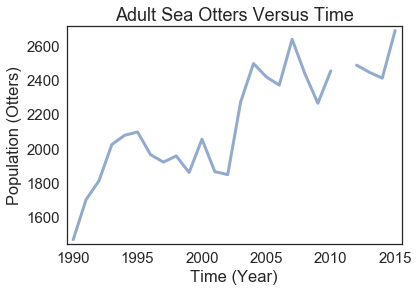

In [6]:
newfig()
plot(table.index, table.independents)
decorate(xlabel='Time (Year)',
         ylabel='Population (Otters)',
         title = "Adult Sea Otters Versus Time")
savefig("datapop.png")

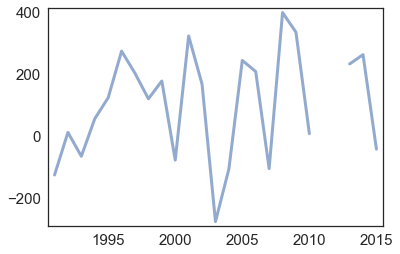

In [7]:
pupdeaths = TimeSeries()
for t in linrange(1990, 2014):
    pupdeaths[t+1] = (table.pups[t] * 0.5) - (table.independents[t+1] - table.independents[t])
plot(pupdeaths)

Saving figure to file calculatedrates.png


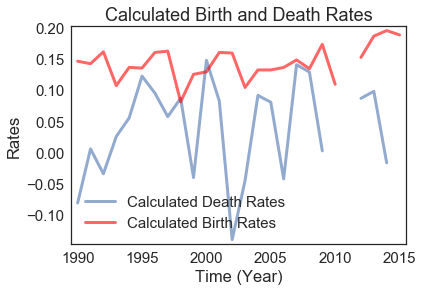

In [34]:
deathrates = TimeSeries()
for t in linrange(1990, 2014):
    deathrates[t] = 1 - (table.independents[t+1]) /(table.independents[t] + table.pups[t] * 0.5)
plot(deathrates, label = "Calculated Death Rates")
plot(table.pupsper100/100, 'r-', label = "Calculated Birth Rates")
decorate(xlabel='Time (Year)',
         ylabel='Rates',
         title = "Calculated Birth and Death Rates")
savefig("calculatedrates.png")

In [7]:
def new_birth_rate(system, table):
    year = randint(system.t0, system.tend + 1)
    while year == 2011:
        year = randint(system.t0, system.tend + 1)
    return table.pupsper100[year]/100

In [1]:
def update_system(system):
    pups = TimeSeries()
    adults = TimeSeries()
    delist = TimeSeries()
    
    pups[system.t0] = system.pups0
    adults[system.t0] = system.adults0
    delist[system.t0] = 3100
    
    t = system.t0
    counter = 0
    
    if system.run_until_safe != True: 
        for t in linrange(system.t0, system.tend):
            births = adults[t] * randint(13, 20)/100 # Chosen from the pups per 100 data
            matures = pups[t] * system.maturerate
            pups[t+1] = pups[t] + births - matures

            deaths = adults[t] * randint(5, 18)/100 # Chosen from the deathrates plot above
            adults[t+1] = adults[t] + matures - deaths
            delist[t+1] = 3100
    else:
        while counter < 3:
            births = adults[t] * randint(13, 20)/100
            matures = pups[t] * system.maturerate
            pups[t+1] = pups[t] + births - matures

            deaths = adults[t] * randint(5, 18)/100
            adults[t+1] = adults[t] + matures - deaths
            if adults[t+1] > 3100:
                counter += 1
            else:
                counter = 0
            t += 1
            delist[t+1] = 3100
        system.tstop = t
    system.pups = pups
    system.adults = adults
    system.delist = delist

In [9]:
def run_simulation(system, num_runs):
    result = 0
    tempSystem = system
    for i in range(num_runs):
        update_system(system)
        result += system.tstop
        system = tempSystem
    return result/num_runs

In [2]:
system = System(pups0 = 214, adults0 = 1466, birthrate = 0.3, maturerate = 0.5, deathrate = 0.1, t0 = 1990, tend = 2015, run_until_safe = False)
update_system(system)
newfig()
plot(table.index, table.independents, label = "Data")
plot(system.adults, label = "Model")
plot(system.delist, label = "Delisting Limit")
decorate(xlabel='Time (Year)',
         ylabel='Population (Otters)',
         title = "Adult Sea Otters Versus Time")
savefig("modelpop.png")

NameError: name 'System' is not defined

In [21]:
system = System(pups0 = 214, adults0 = 1466, birthrate = 0.3, maturerate = 0.5, deathrate = 0.1, t0 = 1990, tend = 2015, run_until_safe = True)
run_simulation(system, 50)

2015.82